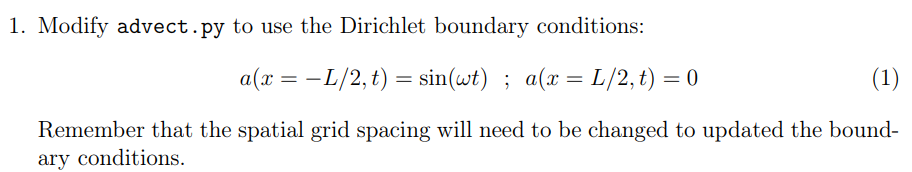

In [10]:
# Advect - program to solve the advection equation using the various hyperbolic PDE schemes.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


def routine(method, tau, omega):

    N = 50 # grid points
    L = 1.0  # System size
    h = L/N  # Grid spacing
    c = 1.0  # Wave speed

    # Set up plot titles
    if method == 1:  ### FTCS Method ###
        plotlabel = 'FTCS'
    elif method == 2:  ### Lax Method ###
        plotlabel = 'Lax'
    elif method == 3:  ### Lax-Wendroff Method  ###
        plotlabel = 'Lax-Wendroff'
    else:
        raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')

    print('Time for wave to move one grid spacing (Courant timestep tc) = {0:.2f}'.format(h/c))

    tc = h/c

    tau *= tc
    coeff = -c*tau/(2.0*h)  # Coefficient used by all schemes
    coefflw = 2*coeff**2  # Coefficient used by L-W scheme

#     print('Wave circles the system in {0:.2f} steps'.format(L/(c*tau)))
    # nStep = int(input('Enter total number of steps: '))
    nStep = int(L/(c*tau))

    # Set initial and boundary conditions
    sigma = 0.1  # Width of the Gaussian pulses
    k_wave = np.pi/sigma  # Wave number of the cosine
    x = np.arange(N)*h - L/2  # Coordinates of the grid points

    # Set up initial condition to be a Gaussian-cosine pulse
    a = np.empty(N)
#     a = np.zeros(N)
    for i in range(N):
        a[i] = np.cos(k_wave*x[i]) * np.exp(-x[i]**2/(2*sigma**2))

    # Use periodic boundary conditions
    ip = np.arange(1, N)
    # ip[-2] = 0  # ip  = i+1 with periodic b.c.
    im = np.arange(0, N-1)
    # im[0] = N-1  # im = i-1 with periodic b.c.

    # Initialize plotting variables
    iplot = 1  # Plot counter
    nplots = 50  # Desired number of plots
    aplot = np.empty((N, nplots))
    tplot = np.empty(nplots)
    aplot[:, 0] = np.copy(a)  # Record the initial state
    tplot[0] = 0  # Record the initial time (t = 0)
    plotStep = nStep/nplots + 1

    # Loop over the desired number of steps
    for iStep in range(nStep):  ## MAIN LOOP ##
        # Compute new values of wave amplitude using FTCS, Lax, or Lax-Wendroff method

        a[0] = np.sin(omega*iStep*tau)
        a[-1] = 0

        if method == 1:  ### FTCS Method ###
    #         a[1:N-1] = a[1:N-1] + coeff*(a[ip] - a[im])
            a[1:N-1] = a[1:N-1] + coeff*(a[2:N] - a[0:N-2])
        elif method == 2:  ### Lax Method ###
    #         a[1:N-1] = 0.5*(a[ip] + a[im]) + coeff*(a[ip] - a[im])
            a[1:N-1] = 0.5*(a[2:N] + a[0:N-2]) + coeff*(a[2:N] - a[0:N-2])
        elif method == 3:  ### Lax-Wendroff Method  ###
            a[1:N-1] = (a[1:N-1] + coeff*(a[2:N] - a[0:N-2])) + coefflw*(a[2:N] + a[0:N-2] - 2*a[1:N-1])
        else:
            raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')


        # Periodically record a(t) for plotting
        if (iStep+1) % plotStep < 1:  # Every plot_iter steps record
            aplot[:, iplot] = np.copy(a)
            aplot[0, iplot] = 1
            tplot[iplot] = tau*(iStep+1)
            iplot += 1
#             print('{0:g} out of {1:g} steps completed.'.format(iStep, nStep))

    # Plot the initial and final states.
    fig, ax = plt.subplots()
#     ax.set_title(r'Advection: ' + plotlabel + ' Method ' + ', $\Delta t/t_c = $ {0:.3f}'.format(tau/tc))
    ax.set_title(f'Advection: {plotlabel} Method,  $\Delta t/t_c = $ {tau/tc:.3f}, freq = {omega:.2f}')
    ax.plot(x, aplot[:, 0], '-', label='Initial')
    ax.plot(x, a, '--', label='Final')
    ax.set_xlabel('x')
    ax.set_ylabel('Amplitude a(x,t)')
    ax.legend()

    # Plot the total wave amplitude versus position and time
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
#     ax2.set_title(r'Advection: ' + plotlabel + ' Method ' + ', $\Delta t/t_c = $ {0:.3f}'.format(tau/tc))
    ax2.set_title(f'Advection: {plotlabel} Method,  $\Delta t/t_c = $ {tau/tc:.3f}, freq = {omega:.2f}')
    
    Tp, Xp = np.meshgrid(tplot[0:iplot], x)  # Arrange data into a format suitable for 3D plots.
    ax2.plot_surface(Tp, Xp, aplot[:, 0:iplot], rstride=1, cstride=1, cmap=cm.viridis)
    ax2.view_init(elev=30., azim=-140.)
    ax2.set_ylabel('Position')
    ax2.set_xlabel('Time')
    ax2.set_zlabel('Amplitude')

    plt.show()
    

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


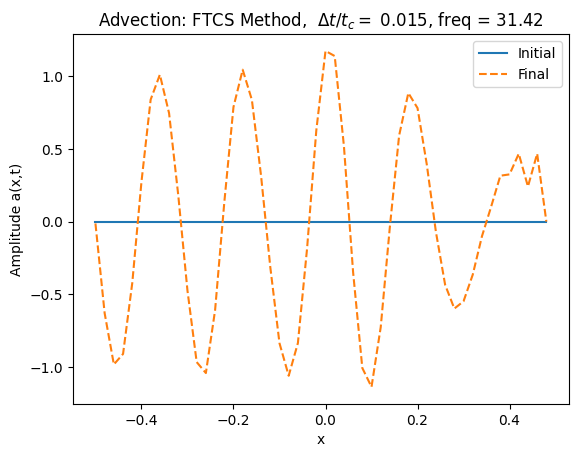

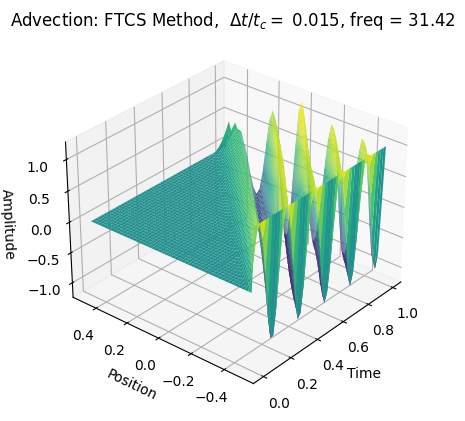

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


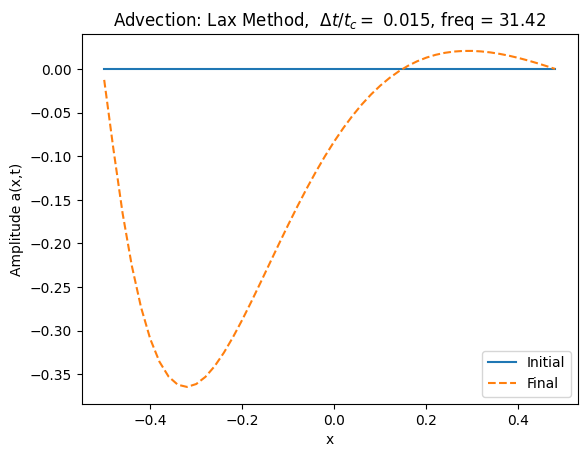

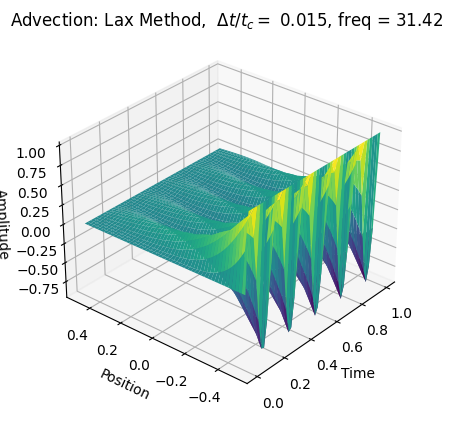

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


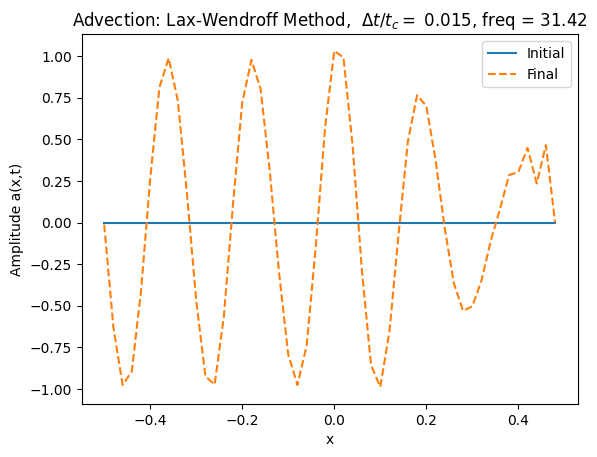

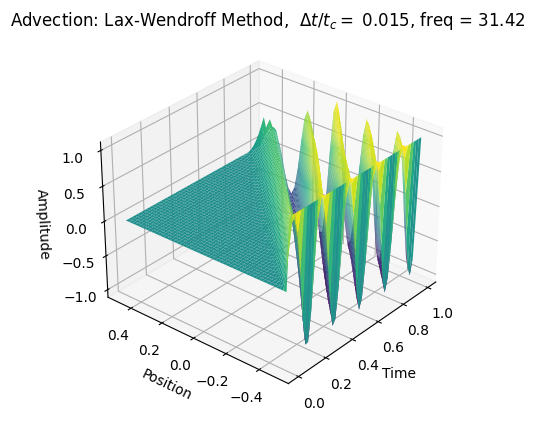

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


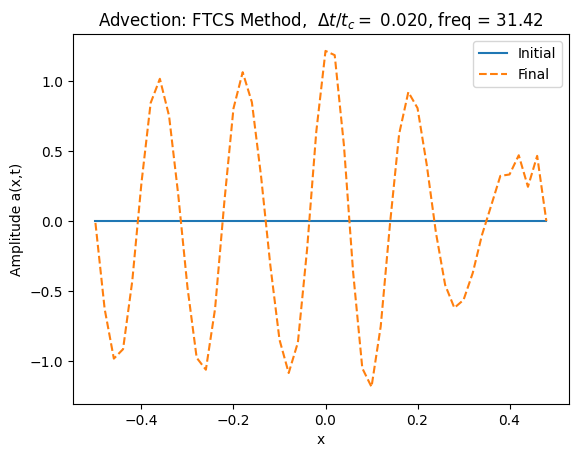

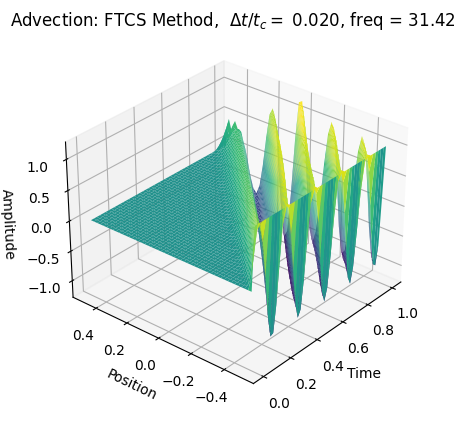

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


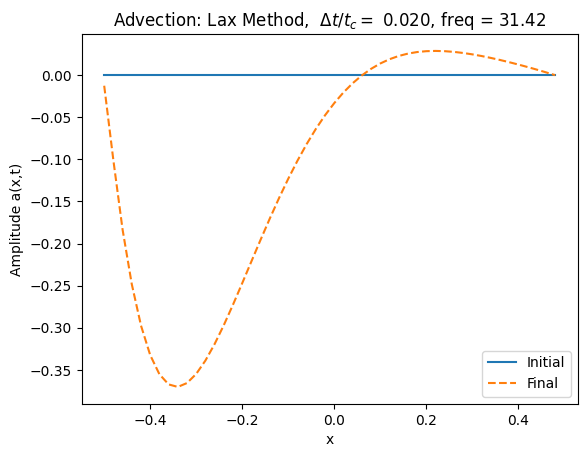

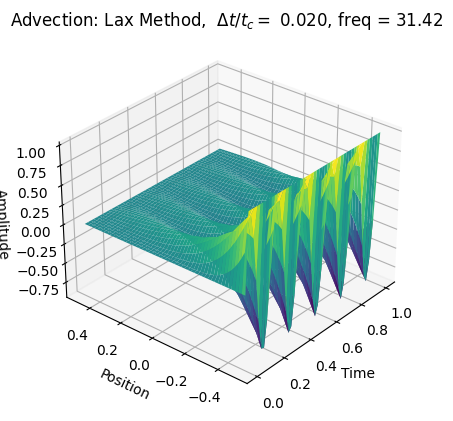

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


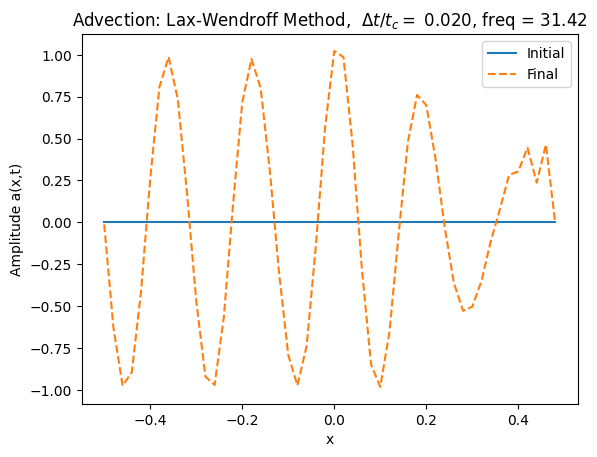

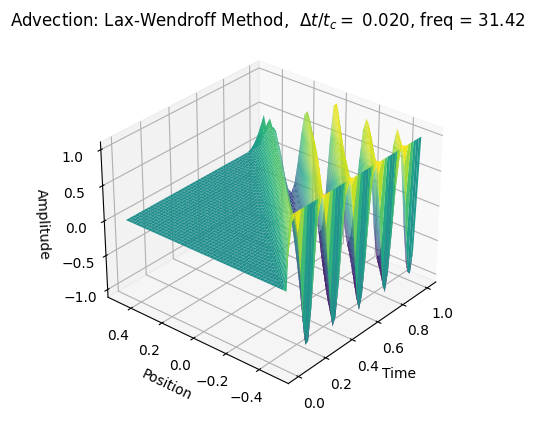

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


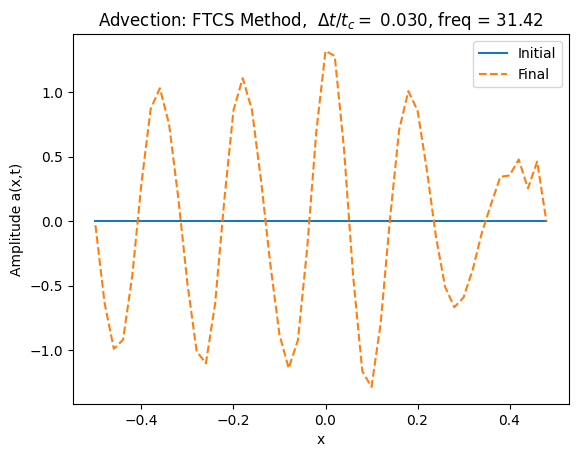

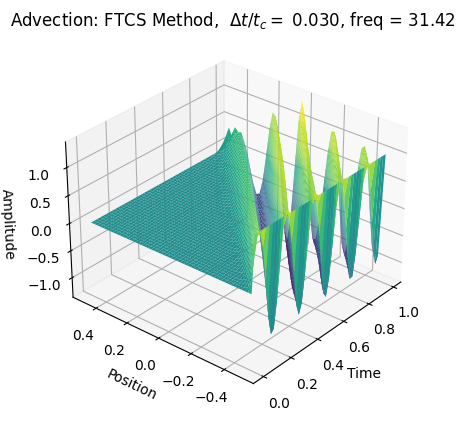

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


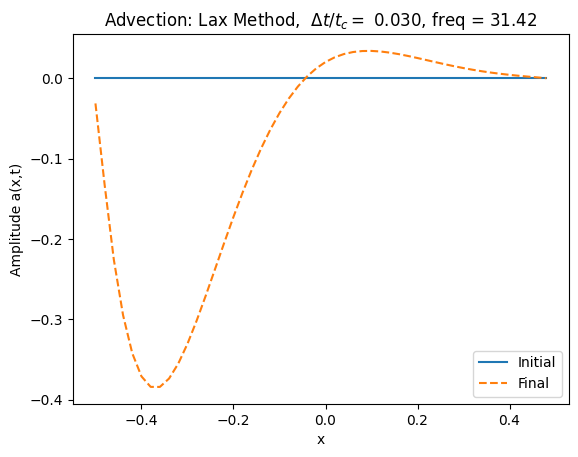

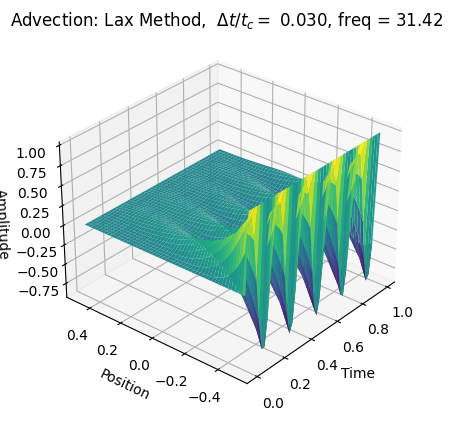

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


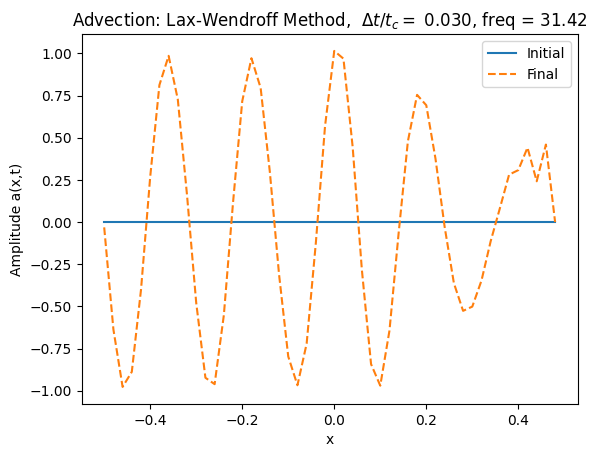

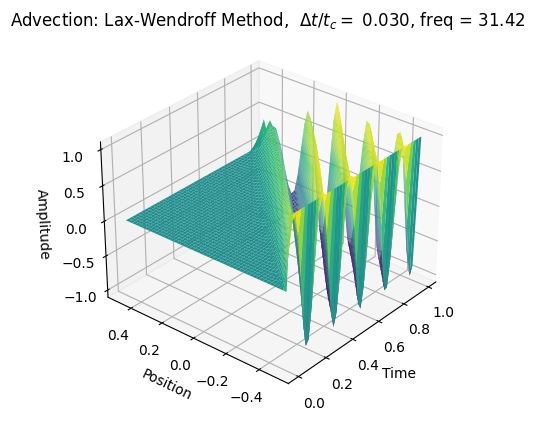

In [2]:
# part 2a
taus = [0.015, 0.02, 0.03]
methods = np.arange(1, 4)

for dt in taus:
    for ww in methods:
        routine(ww, dt, 10*np.pi)

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


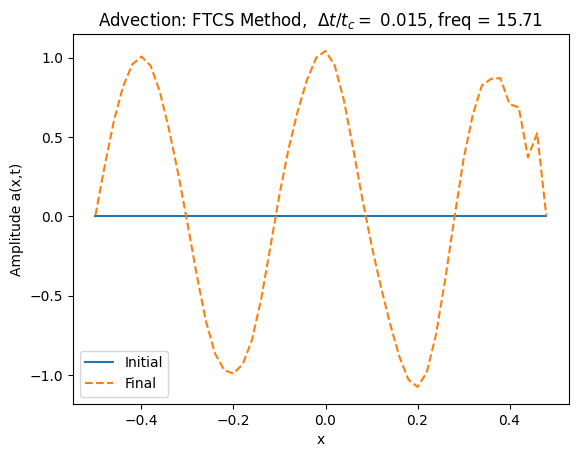

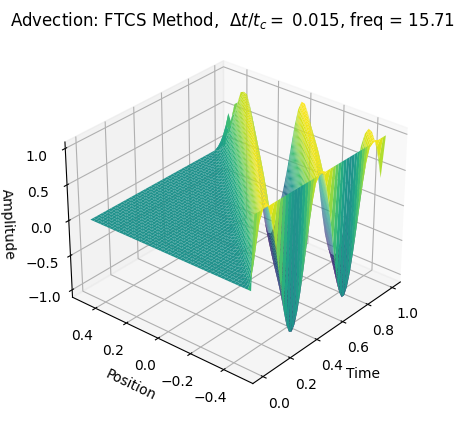

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


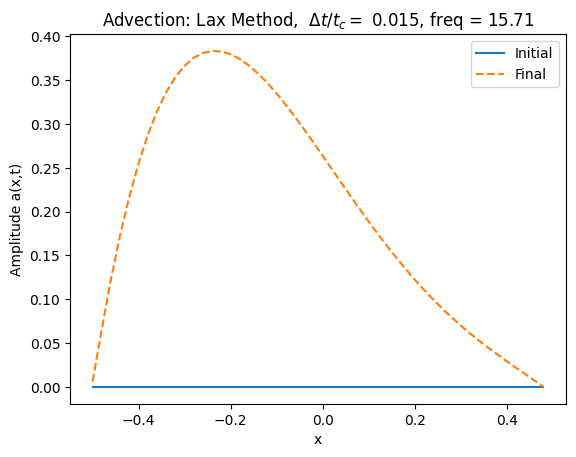

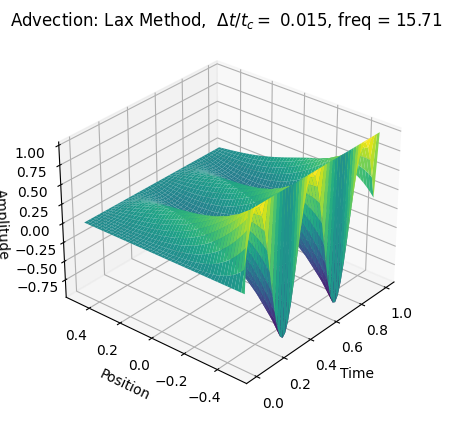

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


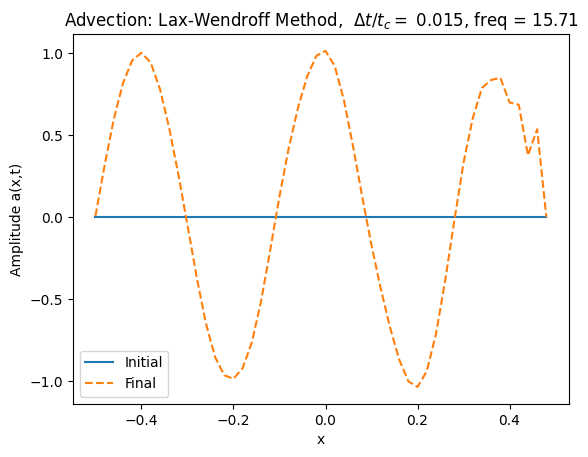

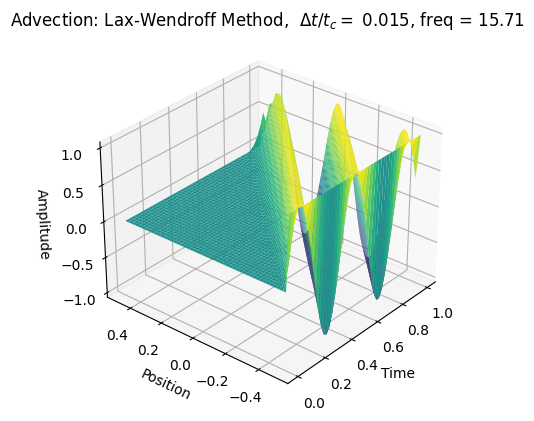

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


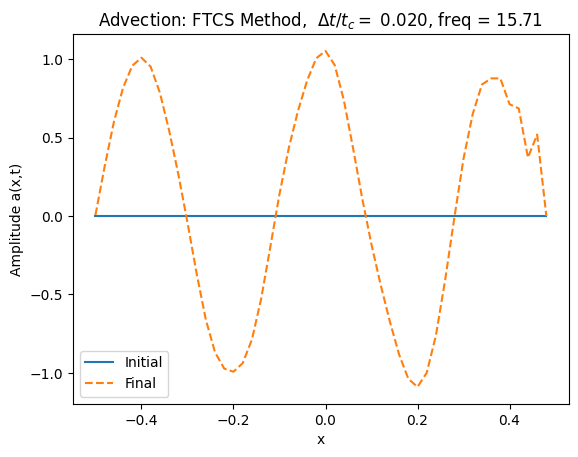

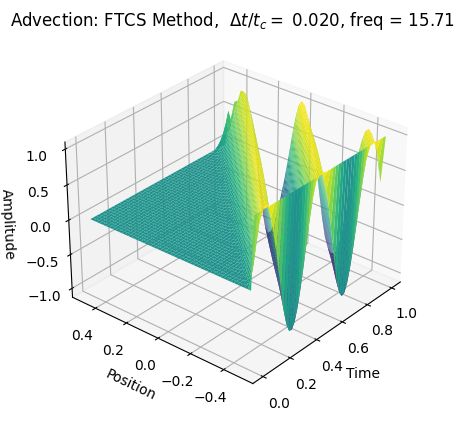

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


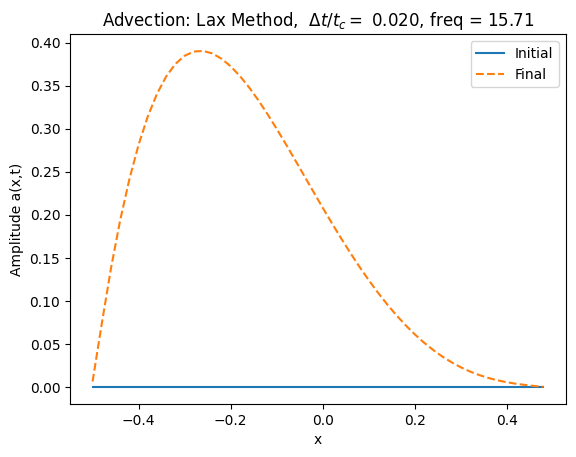

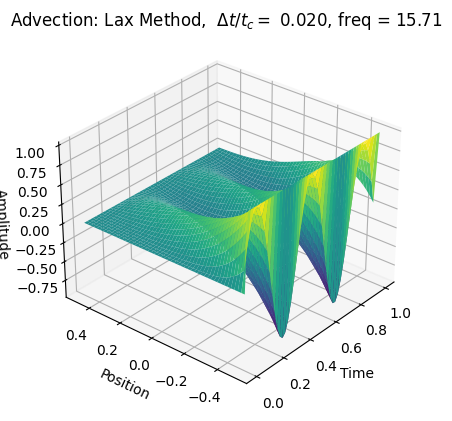

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


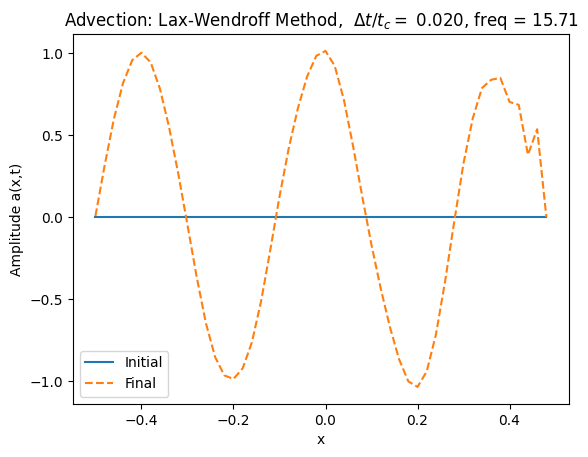

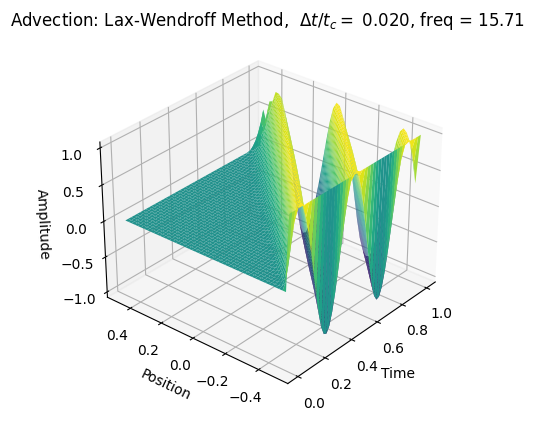

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


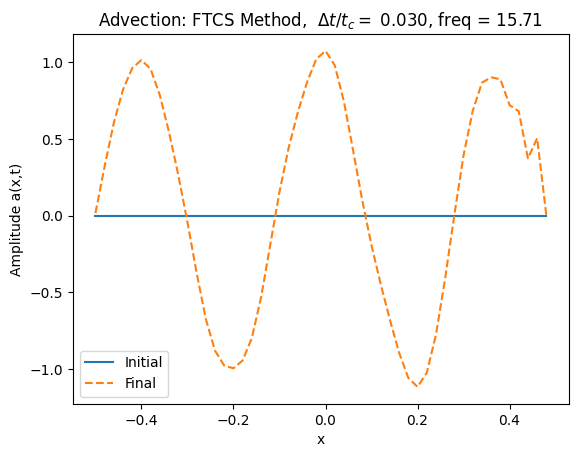

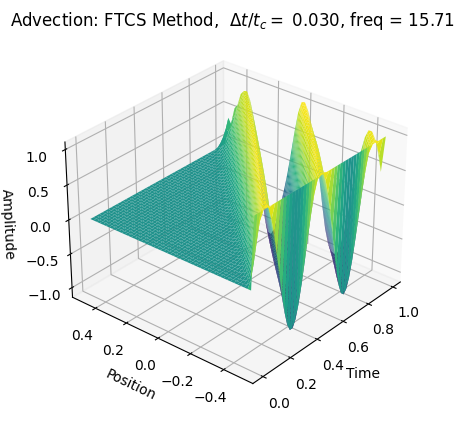

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


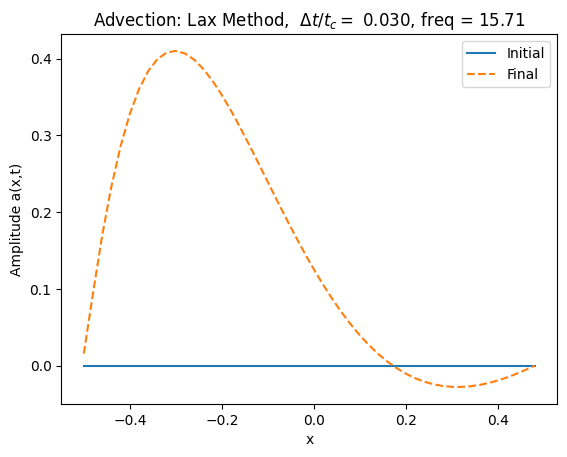

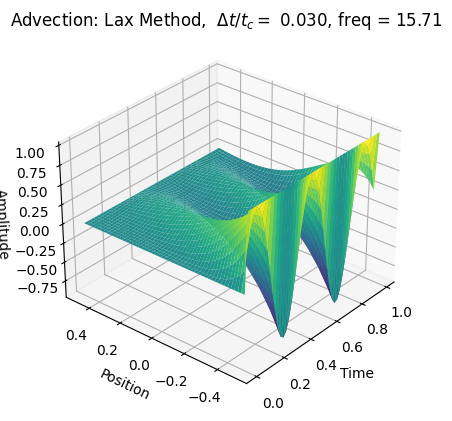

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


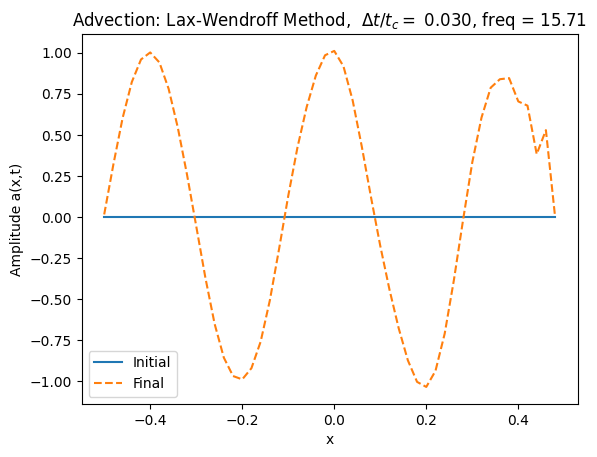

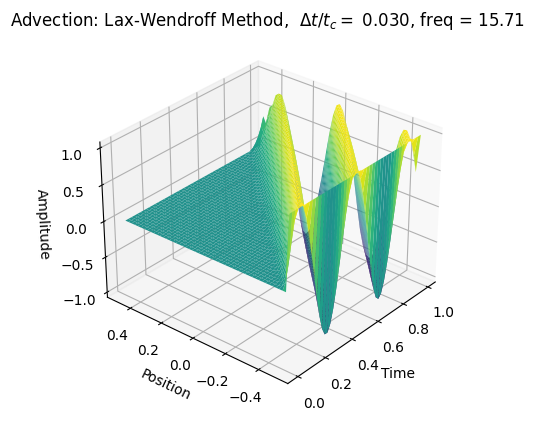

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


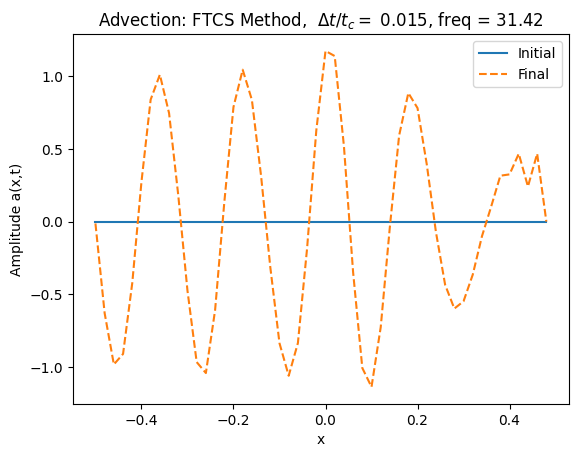

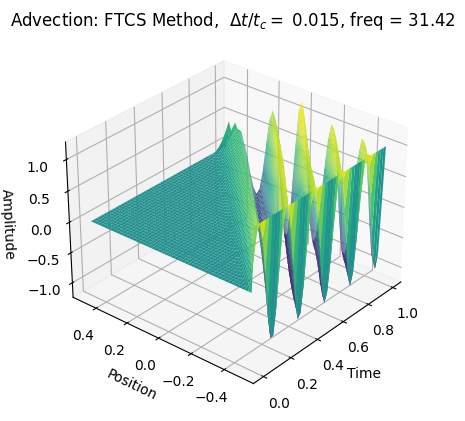

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


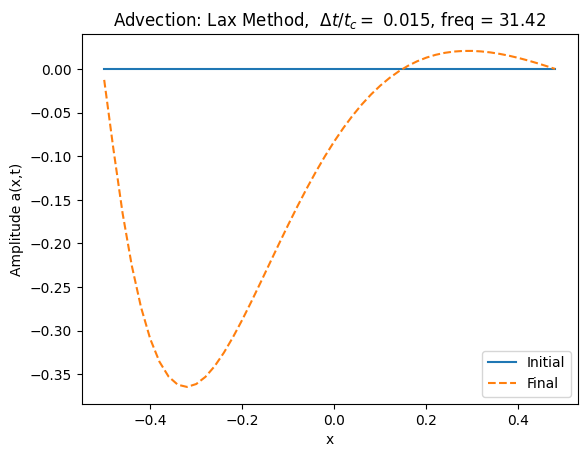

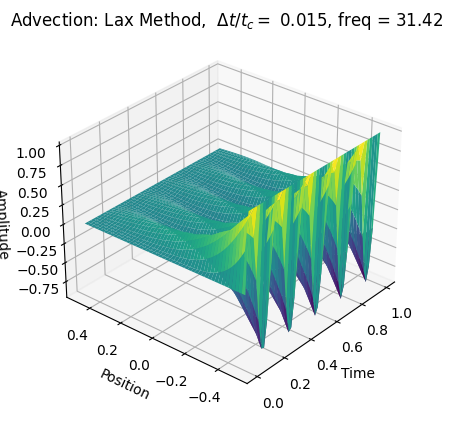

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


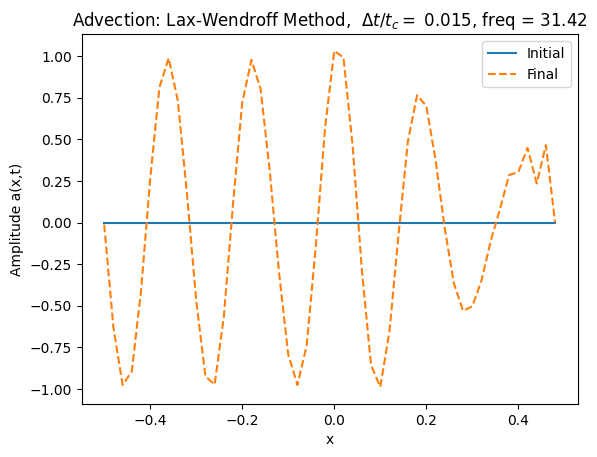

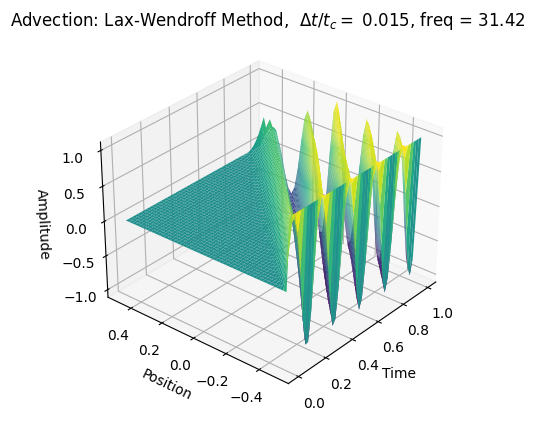

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


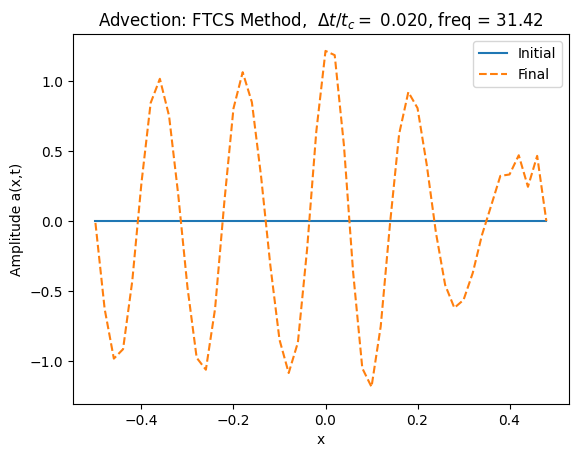

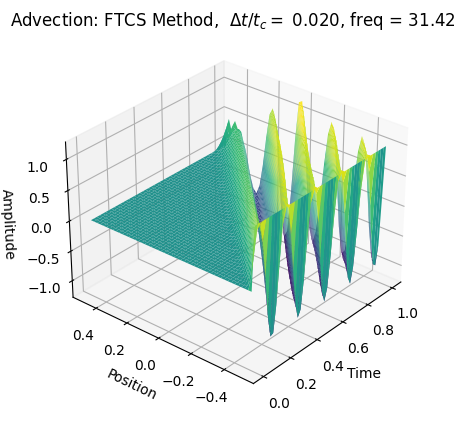

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


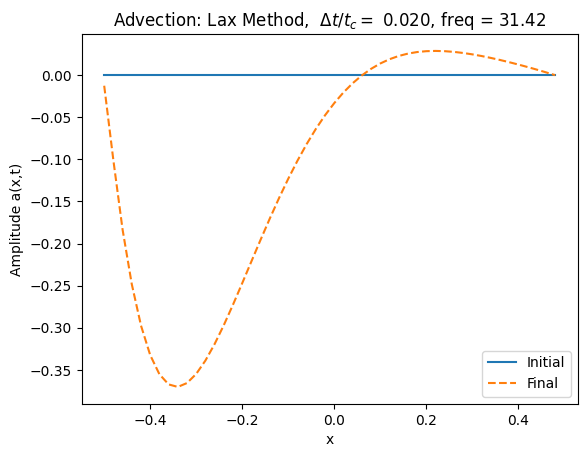

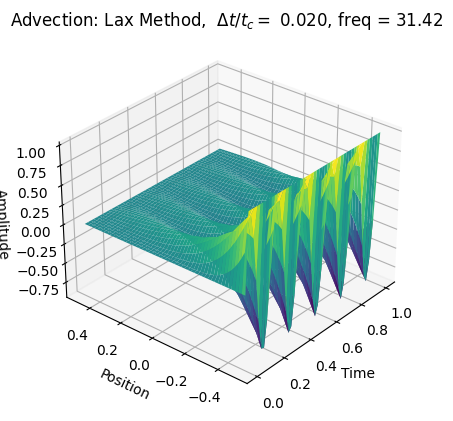

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


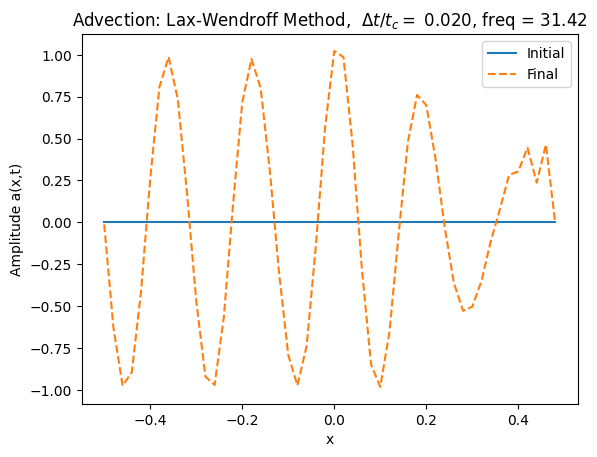

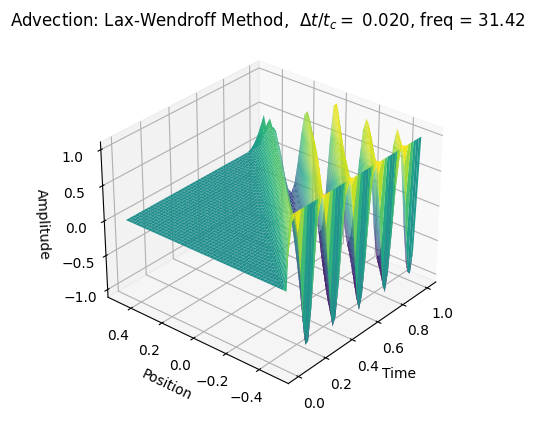

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


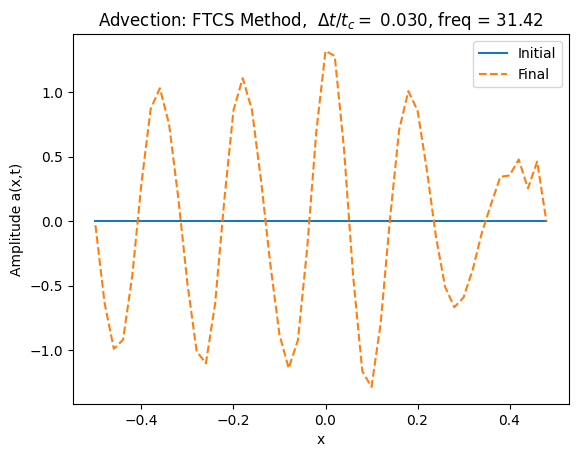

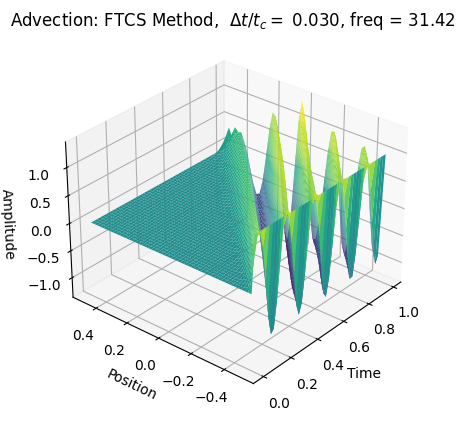

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


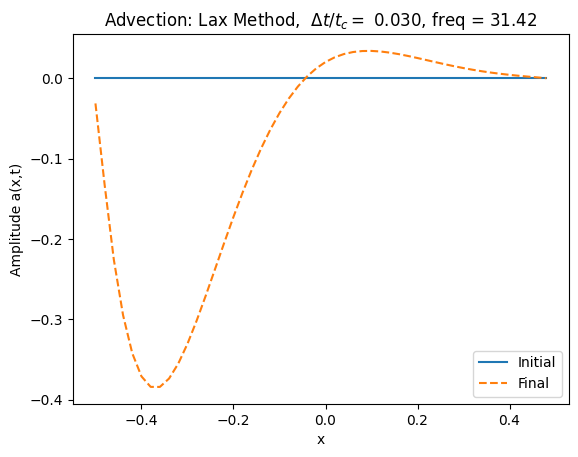

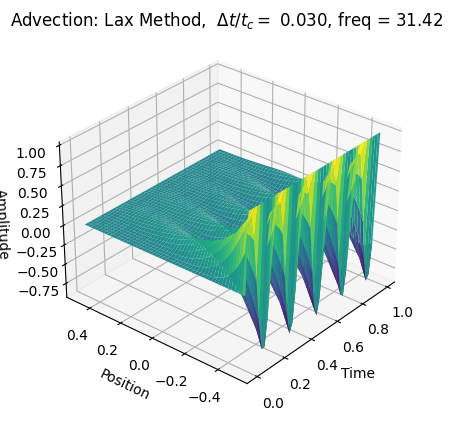

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


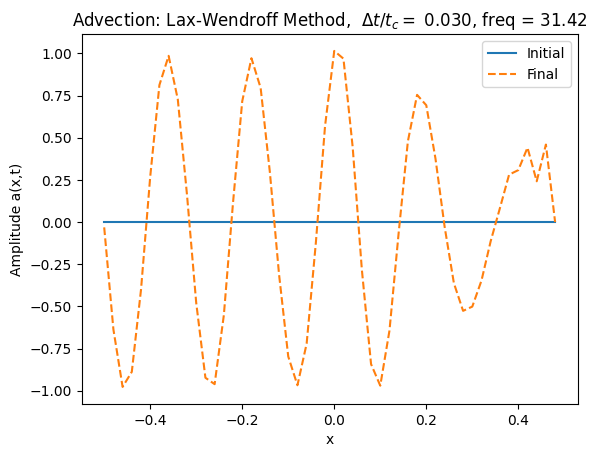

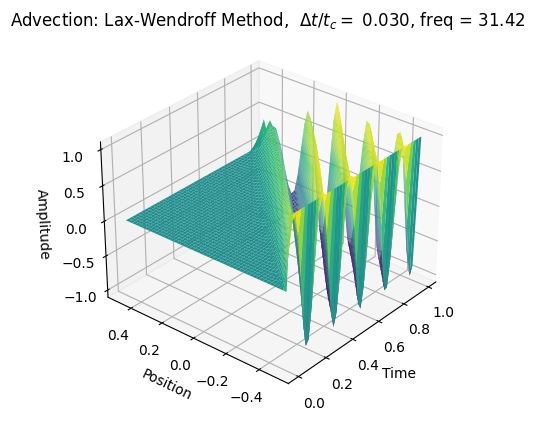

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


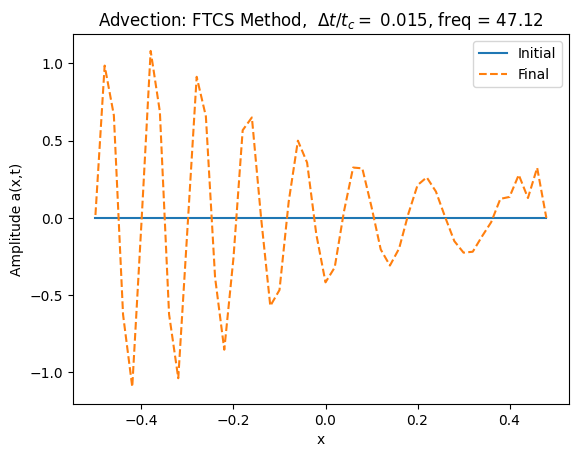

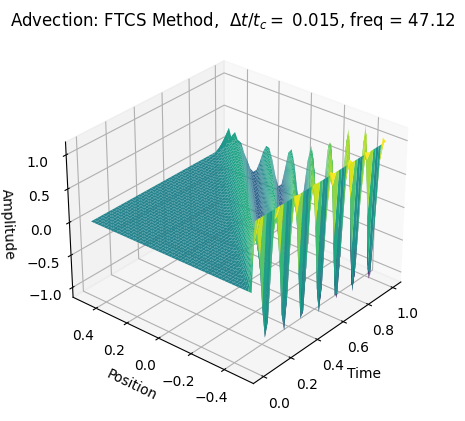

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


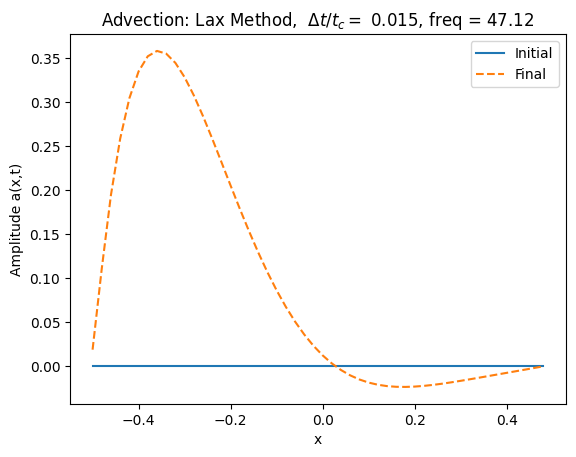

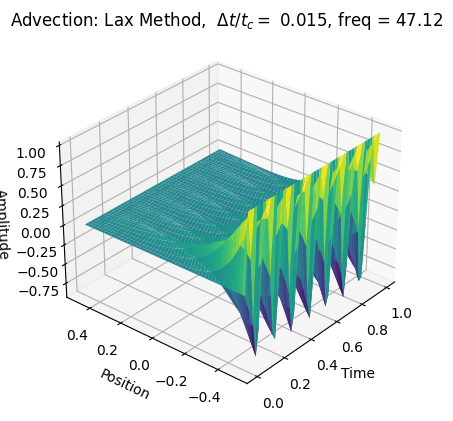

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 3333.33 steps


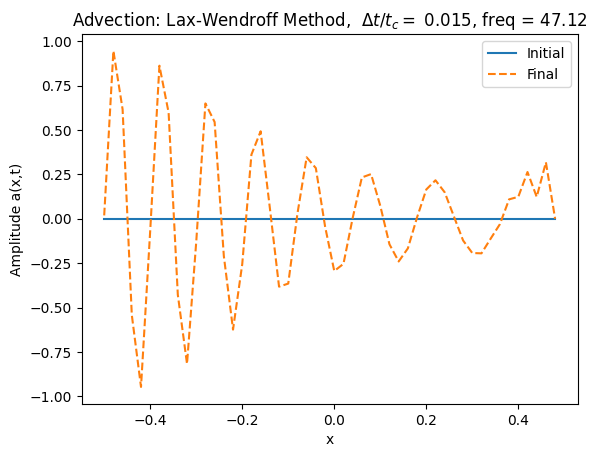

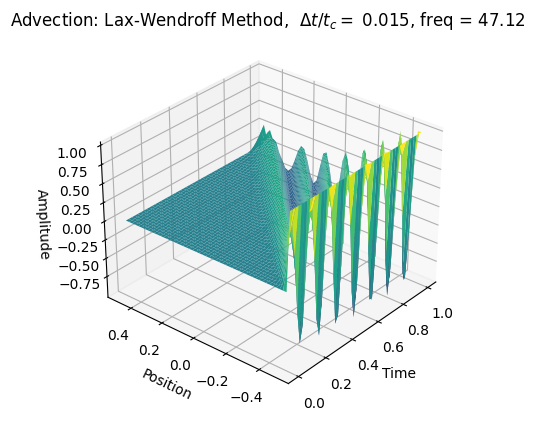

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


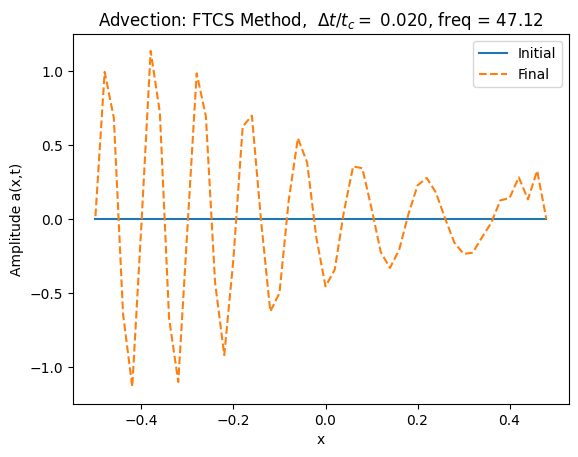

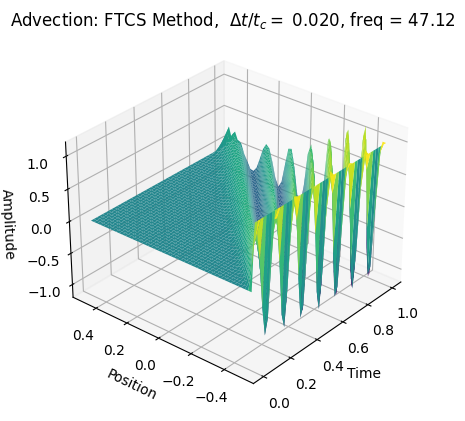

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


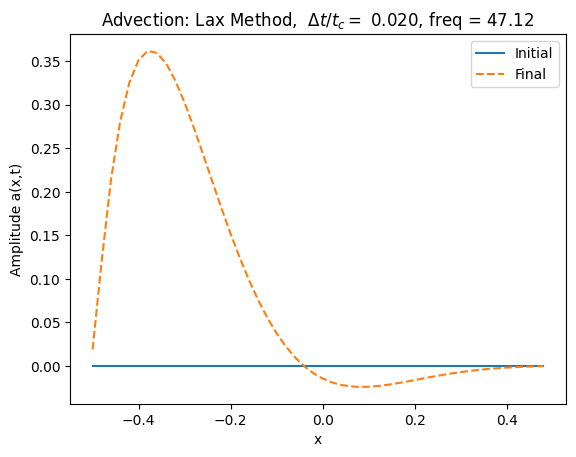

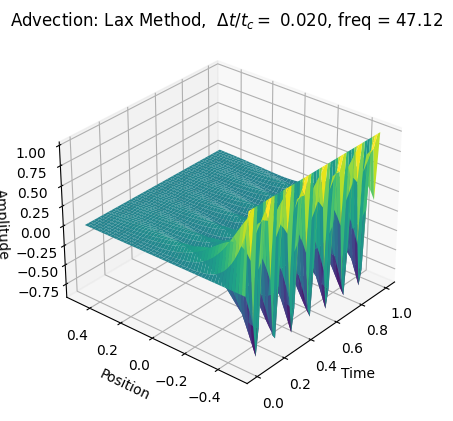

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 2500.00 steps


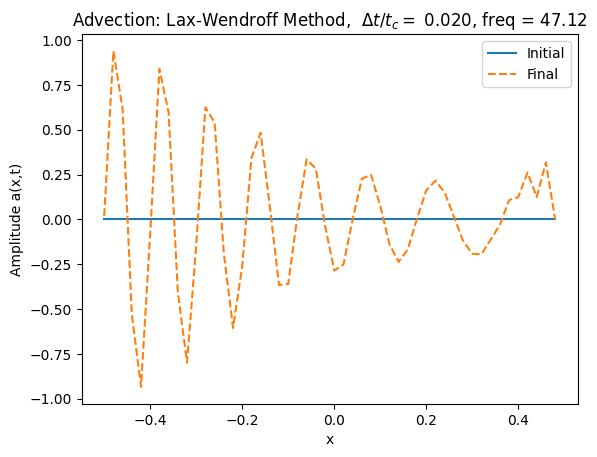

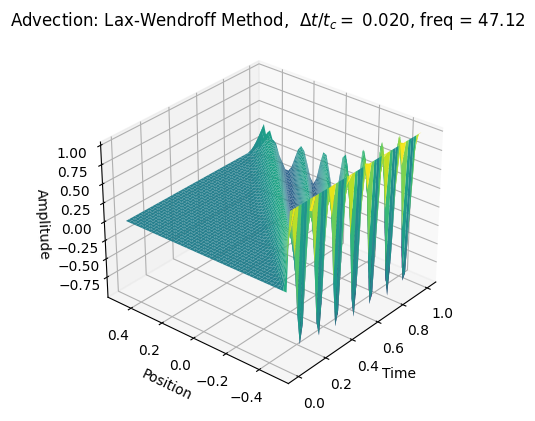

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


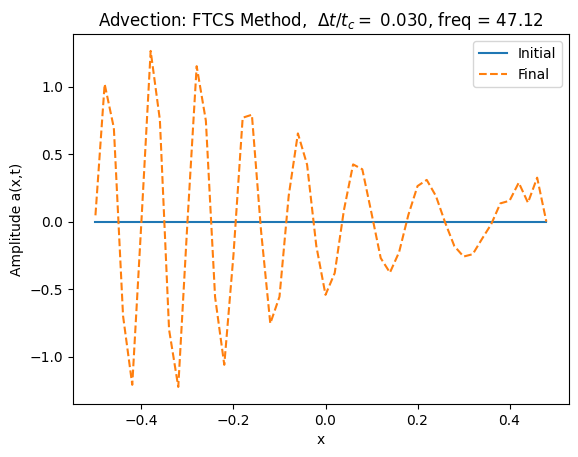

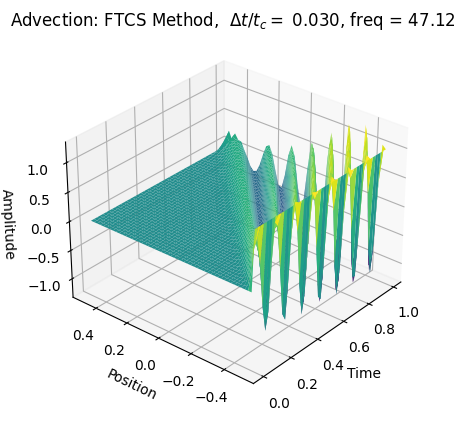

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


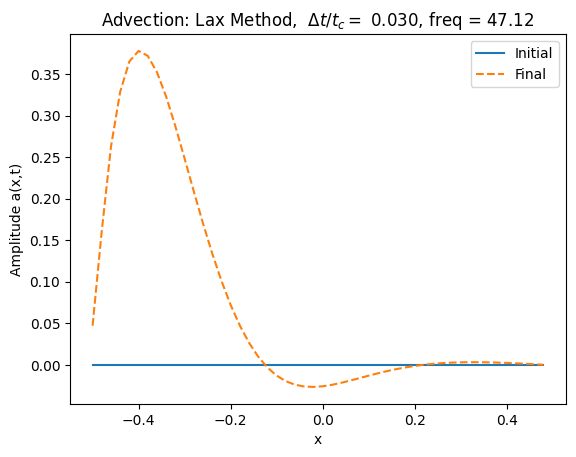

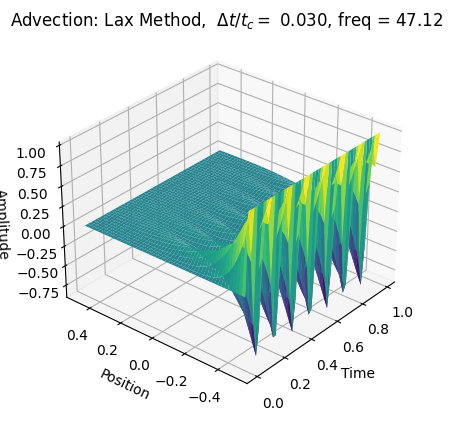

Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 1666.67 steps


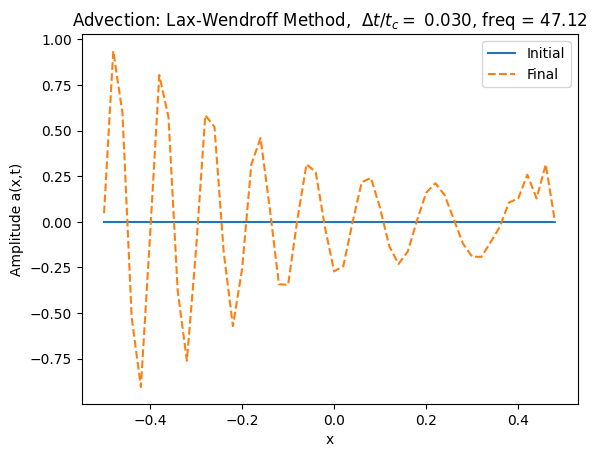

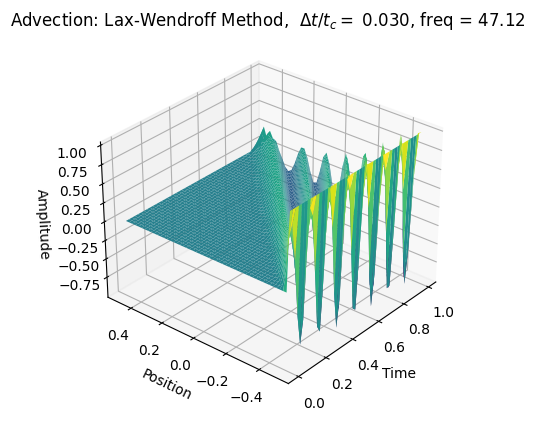

In [3]:
# part 2b
freqs = [5*np.pi, 10*np.pi, 15*np.pi]
for f in freqs:
    for dt in taus:
        for ww in methods:
            routine(ww, dt, f)

Time for wave to move one grid spacing (Courant timestep tc) = 0.02


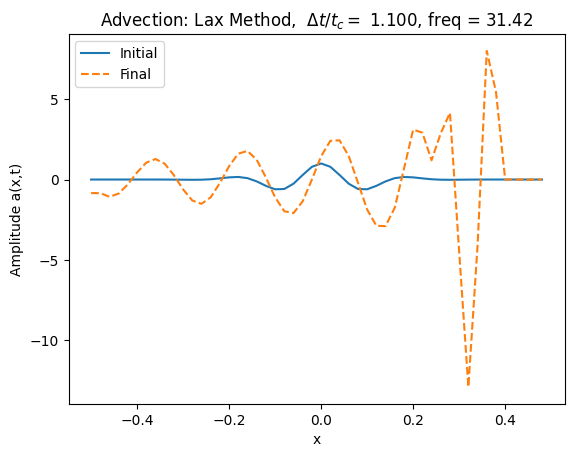

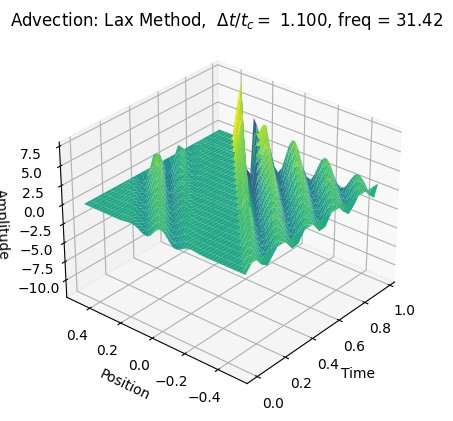

In [23]:
# Challenge
routine(2, 1.1, 10*np.pi)
